In [1]:
!git clone https://github.com/Harshitha-246/FaceMaskDetection.git


Cloning into 'FaceMaskDetection'...
remote: Enumerating objects: 7372, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 7372 (delta 38), reused 9 (delta 3), pack-reused 7263
Receiving objects: 100% (7372/7372), 166.29 MiB | 32.01 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Checking out files: 100% (7568/7568), done.


In [ ]:
# ! python /content/FaceMaskDetection/data_preprocessing.py


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # reading the csv file 
# df=pd.read('/content/drive/My Drive/data') 

In [3]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os



In [4]:
DIRECTORY = '/content/drive/My Drive/data'
CATEGORIES = ["with_mask", "without_mask"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    # path = DIRECTORY
    print(path)
    for img in os.listdir(path):
      img_path = os.path.join(path, img)
      print(img_path)
      image = load_img(img_path, target_size=(224, 224))
      image = img_to_array(image)
      image = preprocess_input(image)

      data.append(image)
      labels.append(category)





[INFO] loading images...
/content/drive/My Drive/data/with_mask
/content/drive/My Drive/data/with_mask/with_mask_2739.jpg
/content/drive/My Drive/data/with_mask/with_mask_2733.jpg
/content/drive/My Drive/data/with_mask/with_mask_2725.jpg
/content/drive/My Drive/data/with_mask/with_mask_2743.jpg
/content/drive/My Drive/data/with_mask/with_mask_2734.jpg
/content/drive/My Drive/data/with_mask/with_mask_2746.jpg
/content/drive/My Drive/data/with_mask/with_mask_2719.jpg
/content/drive/My Drive/data/with_mask/with_mask_2745.jpg
/content/drive/My Drive/data/with_mask/with_mask_2730.jpg
/content/drive/My Drive/data/with_mask/with_mask_2758.jpg
/content/drive/My Drive/data/with_mask/with_mask_2749.jpg
/content/drive/My Drive/data/with_mask/with_mask_2728.jpg
/content/drive/My Drive/data/with_mask/with_mask_2737.jpg
/content/drive/My Drive/data/with_mask/with_mask_2756.jpg
/content/drive/My Drive/data/with_mask/with_mask_2738.jpg
/content/drive/My Drive/data/with_mask/with_mask_2729.jpg
/content

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/content/drive/My Drive/data/with_mask/with_mask_3171.jpg
/content/drive/My Drive/data/with_mask/with_mask_3153.jpg
/content/drive/My Drive/data/with_mask/with_mask_3151.jpg
/content/drive/My Drive/data/with_mask/with_mask_3167.jpg
/content/drive/My Drive/data/with_mask/with_mask_3176.jpg
/content/drive/My Drive/data/with_mask/with_mask_3155.jpg
/content/drive/My Drive/data/with_mask/with_mask_3178.jpg
/content/drive/My Drive/data/with_mask/with_mask_3158.jpg
/content/drive/My Drive/data/with_mask/with_mask_3146.jpg
/content/drive/My Drive/data/with_mask/with_mask_3139.jpg
/content/drive/My Drive/data/with_mask/with_mask_3159.jpg
/content/drive/My Drive/data/with_mask/with_mask_3177.jpg
/content/drive/My Drive/data/with_mask/with_mask_3160.jpg
/content/drive/My Drive/data/with_mask/with_mask_3148.jpg
/content/drive/My Drive/data/with_mask/with_mask_3140.jpg
/content/drive/My Drive/data/with_mask/with_mask_3147.jpg
/content/drive/My Drive/data/with_mask/with_mask_3161.jpg
/content/drive

In [ ]:
# print(labels)

['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask'

In [5]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

In [6]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2 , stratify=labels, random_state=42)

In [7]:
# now, let's take 10% of the training data and use that for validation
(trainX, valData, trainY, valLabels) = train_test_split(trainX, trainY,test_size=0.1, random_state=84)


creating the model

In [8]:
#base model
baseModel = MobileNetV2(include_top= False ,weights="imagenet",input_tensor= Input(shape=(224,224,3)))
#top model
topModel = baseModel.output
topModel = AveragePooling2D(pool_size=(7,7))(topModel)
topModel = Flatten(name = 'flatten')(topModel)
topModel = Dense(120, activation="relu")(topModel)
topModel = Dropout(0.5)(topModel)
topModel = Dense(2, activation="softmax")(topModel)

9420800/9406464 [==============================] - 0s 0us/step


In [9]:
# place the top model above the base
model = Model(inputs = baseModel.input, outputs = topModel)

In [10]:
# freezing the bsse layer for 1st training process
for l in baseModel.layers:
  l.trainable = False

In [11]:
#compilation
LR = 1e-4
EPOCH = 10
BATCH = 30
opt = Adam(learning_rate = LR, decay = LR/EPOCH)
model.compile(loss="binary_crossentropy", optimizer= opt, metrics=["accuracy"])
model.summary()
# model.compile(loss = "binary_crossentropy", optimzer = adam, metrics ="[accuracy]")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [12]:
#train
print("training the model")
model.fit(trainX,trainY,batch_size = BATCH,epochs=EPOCH,validation_data=(valData, valLabels))

training the model
Epoch 1/10
124/124 [==============================] - 26s 109ms/step - loss: 0.3317 - accuracy: 0.8952 - val_loss: 0.1105 - val_accuracy: 0.9661
Epoch 2/10
124/124 [==============================] - 11s 92ms/step - loss: 0.1075 - accuracy: 0.9749 - val_loss: 0.0697 - val_accuracy: 0.9734
Epoch 3/10
124/124 [==============================] - 11s 92ms/step - loss: 0.0708 - accuracy: 0.9811 - val_loss: 0.0579 - val_accuracy: 0.9758
Epoch 4/10
124/124 [==============================] - 11s 92ms/step - loss: 0.0558 - accuracy: 0.9841 - val_loss: 0.0476 - val_accuracy: 0.9806
Epoch 5/10
124/124 [==============================] - 11s 92ms/step - loss: 0.0462 - accuracy: 0.9863 - val_loss: 0.0424 - val_accuracy: 0.9806
Epoch 6/10
124/124 [==============================] - 11s 92ms/step - loss: 0.0381 - accuracy: 0.9906 - val_loss: 0.0382 - val_accuracy: 0.9831
Epoch 7/10
124/124 [==============================] - 11s 92ms/step - loss: 0.0345 - accuracy: 0.9903 - val_loss: 0.

In [13]:
BATCH = 30
preind = model.predict(testX,batch_size = BATCH)
preind = np.argmax(preind, axis =1)
print(classification_report(testY.argmax(axis =1), preind))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       505
           1       0.99      0.99      0.99       526

    accuracy                           0.99      1031
   macro avg       0.99      0.99      0.99      1031
weighted avg       0.99      0.99      0.99      1031



In [14]:
loss, acc=model.evaluate(testX, testY)
#dispalying the accuracy
print("Restored model, accuracy:{:5.2f}%".format(100*acc))

33/33 [==============================] - 4s 96ms/step - loss: 0.0312 - accuracy: 0.9893
Restored model, accuracy:98.93%


In [ ]:
# #save
# print("saving the model")
# !mkdir -p saved_model
# model.save("saved_model/face_mask_detection.h5")


saving the model


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [15]:

model.save("mask_prediction_model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
# import torch
# model_save_name = 'classifier.pt'
# path = f"/content/drive/MyDrive" 
# torch.save(model, path)

IsADirectoryError: ignored

In [ ]:
# !ls /content/saved_model

In [ ]:
# import tensorflow as tf
# model2 = tf.keras.models.load_model('/content/saved_model/face_mask_detection.h5')
# model2.summary();

In [ ]:
# import torch
# model_save_name = 'classifier.pt'
# path = F"/content/gdrive/My Drive/{model_save_name}" 
# torch.save(model2.state_dict(), path)

In [ ]:
# import tensorflow as tf
# import cv2  

# # model = tf.keras.models.load_model('face_mask_detection')

# # Check its architecture
# model2.summary()
# face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

In [24]:
import cv2
image = cv2.imread('/content/drive/MyDrive/examples/example_01.png')
# image = cv2.imread('/content/drive/MyDrive/data/with_mask/with_mask_1.jpg')
# image = cv2.imread('/content/drive/MyDrive/exps/MicrosoftTeams-image.png')
# image = cv2.imread('/content/drive/MyDrive/examples/MicrosoftTeams-image.png')
# print(image)
ori = image.copy()
(h,w)= image.shape[:2]
# create blob
blob = cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))
print("First Blob: {}".format(blob.shape))

First Blob: (1, 3, 300, 300)


Inside if
Masked


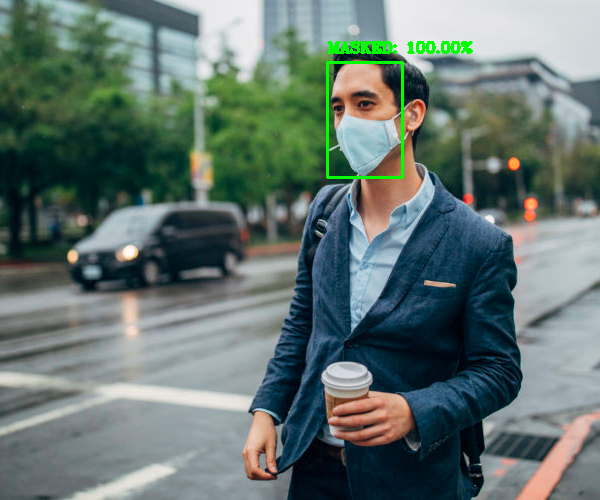

In [27]:
from google.colab.patches import cv2_imshow
net = cv2.dnn.readNet('/content/drive/My Drive/face_detector/deploy.prototxt','/content/drive/My Drive/face_detector/res10_300x300_ssd_iter_140000.caffemodel')
net.setInput(blob)
detections = net.forward()
#print(detections.shape[2])
for i in range(0,detections.shape[2]):
 
  confi = detections[0,0,i,2]
  # print(confi)
  # print(h )
  if (confi> 0.5):
    print("Inside if")
    box = detections[0,0,i,3:7] * np.array([w,h,w,h])
    startX,startY,endX,endY = box.astype("int")

    startX = max(0,startX)
    startY = max(0,startY)
    endX = min(w-1,endX)
    endY = min(h-1,endY)
    face = image[startY:endY,startX:endX]
    face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
    face = cv2.resize(face,(224,224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face =np.expand_dims(face,axis=0)
    (with_mask,without_mask) = model.predict(face)[0]
    if(with_mask>without_mask):
        print("Masked");
        label = "MASKED"
        color=(0,255,0)
    else:
        print("Not Masked");
        label = "NOT MASKED"
        color=(0,0,255)  
    label = "{}: {:.2f}%".format(label,max(with_mask,without_mask)*100)
    cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_COMPLEX,0.5,color,2)
    cv2.rectangle(image,(startX,startY),(endX,endY),color,2)
    cv2_imshow(image)
    cv2.waitKey(0)

In [ ]:
# import tensorflow as tf

# model.save('/content/saved_model/model.h5')
# loaded_model = tf.keras.models.load_model('/content/saved_model/model.h5')

In [ ]:
# model.save('saved_model/my_model') 

In [ ]:
# from google.colab.patches import cv2_imshow
# # net = cv2.dnn.readNet('/content/drive/My Drive/face_detector/deploy.prototxt','/content/drive/My Drive/face_detector/res10_300x300_ssd_iter_140000.caffemodel')
# # net.setInput(blob)
# # detections = net.forward()
# #print(detections.shape[2])
# img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# img = cv2.resize(img,(224,224))
# img = img_to_array(img)
# img = preprocess_input(img)
# img =np.expand_dims(img,axis=0)
# (with_mask,without_mask) = model.predict(img)[0]
# if(with_mask>without_mask):
#   label = "MASKED"
#   color=(0,255,0)
#   print("masked")
# else:
#   label = "NOT MASKED"
#   print("not masked")
#   color=(255,0,0)  
# label = "{}: {:.2f}%".format(label,max(with_mask,without_mask)*100)
# cv2.putText(image,label,(0,20),cv2.FONT_HERSHEY_COMPLEX,0.5,color,2)
# cv2.rectangle(image,(0,0),(224,224),color,2)
# cv2_imshow(image)
# cv2.waitKey(0)

In [ ]:
# from imutils.video import VideoStream
# def detectMask(image,net,maskNet):
#   (h,w)= image.shape[:2]
#   # create blob
#   blob = cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))
#   net.setInput(blob)
#   detections = net.forward()
#   #print(detections.shape[2])
#   faces =[]
#   locs=[]
#   preds=[]
#   for i in range(0,detections.shape[2]):
#     confi = detections[0,0,i,2]
#     # print(confi)
#     # print(h )
#     if (confi> 0.5):
#       box = detections[0,0,i,3:7] * np.array([w,h,w,h])
#       startX,startY,endX,endY = box.astype("int")

#       startX = max(0,startX)
#       startY = max(0,startY)
#       endX = min(w-1,endX)
#       endY = min(h-1,endY)
#       face = image[startY:endY,startX:endX]
#       face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
#       face = cv2.resize(face,(224,224))
#       face = img_to_array(face)
#       face = preprocess_input(face)
#       faces.append(face)
#       locs.append((startX,startY,endX,endY))
#   if(flen(faces) >0):
#     faces =np.array(faces,dtype="float32")
#     preds = maskNet.predict(faces, batch_size =30)
#   return(locs,preds)

#       # face =np.expand_dims(face,axis=0)
#     # (with_mask,without_mask) = model.predict(face)[0]
#     # if(with_mask>without_mask):
#     #     label = "MASKED"
#     #     color=(0,255,0)
#     # else:
#     #     label = "NOT MASKED"
#     #     color(255,0,0)  
#     # label = "{}: {:.2f}%".format(label,max(with_mask,without_mask)*100)
#     # cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_COMPLEX,0.5,color,2)
#     # cv2.rectangle(image,(startX,startY),(endX,endY),color,2)
#     # cv2_imshow(image)
#     # cv2.waitKey(0)

# net = cv2.dnn.readNet('/content/drive/My Drive/face_detector/deploy.prototxt','/content/drive/My Drive/face_detector/res10_300x300_ssd_iter_140000.caffemodel')


In [ ]:
# import base64
# import html
# import io
# import time

# from IPython.display import display, Javascript
# from google.colab.output import eval_js
# import numpy as np
# from PIL import Image
# import cv2
# def start_input():
#   js = Javascript('''
#     var video;
#     var div = null;
#     var stream;
#     var captureCanvas;
#     var imgElement;
#     var labelElement;
    
#     var pendingResolve = null;
#     var shutdown = false;
    
#     function removeDom() {
#        stream.getVideoTracks()[0].stop();
#        video.remove();
#        div.remove();
#        video = null;
#        div = null;
#        stream = null;
#        imgElement = null;
#        captureCanvas = null;
#        labelElement = null;
#     }
    
#     function onAnimationFrame() {
#       if (!shutdown) {
#         window.requestAnimationFrame(onAnimationFrame);
#       }
#       if (pendingResolve) {
#         var result = "";
#         if (!shutdown) {
#           captureCanvas.getContext('2d').drawImage(video, 0, 0, 512, 512);
#           result = captureCanvas.toDataURL('image/jpeg', 0.8)
#         }
#         var lp = pendingResolve;
#         pendingResolve = null;
#         lp(result);
#       }
#     }
#      async function createDom() {
#       if (div !== null) {
#         return stream;
#       }
#       div = document.createElement('div');
#       div.style.border = '2px solid black';
#       div.style.padding = '3px';
#       div.style.width = '100%';
#       div.style.maxWidth = '600px';
#       document.body.appendChild(div);
      
#       const modelOut = document.createElement('div');
#       modelOut.innerHTML = "<span>Status:</span>";
#       labelElement = document.createElement('span');
#       labelElement.innerText = 'No data';
#       labelElement.style.fontWeight = 'bold';
#       modelOut.appendChild(labelElement);
#       div.appendChild(modelOut);
           
#       video = document.createElement('video');
#       video.style.display = 'block';
#       video.width = div.clientWidth - 6;
#       video.setAttribute('playsinline', '');
#       video.onclick = () => { shutdown = true; };
#       stream = await navigator.mediaDevices.getUserMedia(
#           {video: { facingMode: "environment"}});
#       div.appendChild(video);
#       imgElement = document.createElement('img');
#       imgElement.style.position = 'absolute';
#       imgElement.style.zIndex = 1;
#       imgElement.onclick = () => { shutdown = true; };
#       div.appendChild(imgElement);
      
#       const instruction = document.createElement('div');
#       instruction.innerHTML = 
#           '<span style="color: red; font-weight: bold;">' +
#           'When finished, click here or on the video to stop this demo</span>';
#       div.appendChild(instruction);
#       instruction.onclick = () => { shutdown = true; };
#        video.srcObject = stream;
#       await video.play();
#       captureCanvas = document.createElement('canvas');
#       captureCanvas.width = 512; //video.videoWidth;
#       captureCanvas.height = 512; //video.videoHeight;
#       window.requestAnimationFrame(onAnimationFrame);
      
#       return stream;
#     }
#     async function takePhoto(label, imgData) {
#       if (shutdown) {
#         removeDom();
#         shutdown = false;
#         return '';
#       }
#       var preCreate = Date.now();
#       stream = await createDom();
      
#       var preShow = Date.now();
#       if (label != "") {
#         labelElement.innerHTML = label;
#       }
            
#       if (imgData != "") {
#         var videoRect = video.getClientRects()[0];
#         imgElement.style.top = videoRect.top + "px";
#         imgElement.style.left = videoRect.left + "px";
#         imgElement.style.width = videoRect.width + "px";
#         imgElement.style.height = videoRect.height + "px";
#         imgElement.src = imgData;
#       }
      
#       var preCapture = Date.now();
#       var result = await new Promise(function(resolve, reject) {
#         pendingResolve = resolve;
#       });
#       shutdown = false;
      
#       return {'create': preShow - preCreate, 
#               'show': preCapture - preShow, 
#               'capture': Date.now() - preCapture,
#               'img': result};
#     }
#     ''')
#   display(js)
# def take_photo(label, img_data):
#   data = eval_js('takePhoto("{}", "{}")'.format(label, img_data))
#   return data

In [ ]:

# def js_reply_to_image(js_reply):
#     """
#     input: 
#           js_reply: JavaScript object, contain image from webcam
#     output: 
#           image_array: image array RGB size 512 x 512 from webcam
#     """
#     jpeg_bytes = base64.b64decode(js_reply['img'].split(',')[1])
#     image_PIL = Image.open(io.BytesIO(jpeg_bytes))
#     image_array = np.array(image_PIL)

#     return image_array

In [ ]:
# start_input()
# count =0
# from google.colab.patches import cv2_imshow
# while True:
#   js_reply = take_photo("Capturing",'')
#   if (not js_reply):
#     break;
#     img = js_reply_to_image(js_reply)
#     image = img
#     v = True
#     if (v == True):
#       image = imutils.resize(image,width = 400)
#       (locs,preds) = detectMask(image,net,model)
#       for(box,pred) in zip(locs,preds):
#         (startX, startY, endX, endY) = box
#         (with_mask,without_mask) = pred
#         if(with_mask>without_mask):
#           label = "MASKED"
#           color=(0,255,0)
#         else:
#           label = "NOT MASKED"
#           color(255,0,0)  
#         label = "{}: {:.2f}%".format(label,max(with_mask,without_mask)*100)
#         image =cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_COMPLEX,0.5,color,2)
#         image =cv2.rectangle(image,(startX,startY),(endX,endY),color,2)
#         cv2_imshow(image)
#     # cv2.waitKey(0)